In [205]:
!pip install pandas

# **ECCENTRICITY**

In [206]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [207]:
df = pd.read_csv('/content/eccentricity.csv')
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [208]:
print(df.head())

    sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0  2.522315  2.431974  31:39.0  8.332031           0    eccentricity
1  2.523629  2.431317  31:39.0  8.332031           0    eccentricity
2  2.522644  2.428032  31:39.0  8.332031           0    eccentricity
3  2.521987  2.430660  31:39.0  8.332031           0    eccentricity
4  2.522808  2.430168  31:39.0  8.332031           0    eccentricity


In [209]:
df['time_x'].head()

0    31:39.0
1    31:39.0
2    31:39.0
3    31:39.0
4    31:39.0
Name: time_x, dtype: object

In [210]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['time_x'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [211]:
# Convert 'time_x' to seconds
df['time_x_seconds'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df = df[(df['time_x_seconds'] >= 39) & (df['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [212]:
# Convert 'time_x' to seconds
df['time_x_seconds'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 40 and 41
filtered_df1 = df[(df['time_x_seconds'] >= 40) & (df['time_x_seconds'] < 41)]

# Display the filtered DataFrame
print(filtered_df)


Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [213]:
df.head(50)

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds
0,2.522315,2.431974,31:39.000000,8.332031,0,eccentricity,1899.0
1,2.523629,2.431317,31:39.000000,8.332031,0,eccentricity,1899.0
2,2.522644,2.428032,31:39.000000,8.332031,0,eccentricity,1899.0
3,2.521987,2.430660,31:39.000000,8.332031,0,eccentricity,1899.0
4,2.522808,2.430168,31:39.000000,8.332031,0,eccentricity,1899.0
5,2.523136,2.431974,31:39.000000,8.332031,0,eccentricity,1899.0
6,2.522151,2.429182,31:39.000000,8.332031,0,eccentricity,1899.0
7,2.519851,2.431153,31:39.000000,8.332031,0,eccentricity,1899.0
8,2.522479,2.430496,31:39.000000,8.332031,0,eccentricity,1899.0
9,2.523301,2.432960,31:39.000000,8.332031,0,eccentricity,1899.0


In [214]:
df.shape

(150000, 7)

In [215]:
df.describe()

,sensor1,sensor2,speedSet,load_value,time_x_seconds
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,2.521244,2.430165,24.444010,40.000000,1659.332800
std,0.006252,0.006477,12.934413,40.000133,303.414192
min,2.467454,2.380727,8.332031,0.000000,1200.000000
25%,2.518866,2.427375,8.332031,0.000000,1327.500000
50%,2.521822,2.430825,25.000000,40.000000,1732.500000
75%,2.523793,2.432796,40.000000,80.000000,1901.500000
max,2.564200,2.486836,40.000000,80.000000,2062.000000


In [216]:
df.columns

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'time_x_seconds'],
      dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
 6   time_x_seconds   150000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.0+ MB


In [218]:
# Remove rows with NaN values
df_cleaned = df.dropna()

In [219]:
print(df_cleaned)

         sensor1   sensor2        time_x   speedSet  load_value  \
0       2.522315  2.431974  31:39.000000   8.332031           0   
1       2.523629  2.431317  31:39.000000   8.332031           0   
2       2.522644  2.428032  31:39.000000   8.332031           0   
3       2.521987  2.430660  31:39.000000   8.332031           0   
4       2.522808  2.430168  31:39.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.525272  2.451028  29:40.000000  40.000000          80   
149996  2.529542  2.442815  29:40.000000  40.000000          80   
149997  2.519851  2.447579  29:40.000000  40.000000          80   
149998  2.516073  2.431153  29:40.000000  40.000000          80   
149999  2.517059  2.442979  29:40.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0         eccentricity          1899.0  
1         eccentricity          1899.0  
2         eccentricity          1899.0  
3         eccentricity         

In [220]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['minute'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64


In [221]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64


In [222]:
df['minute'].value_counts().sort_index()

minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64

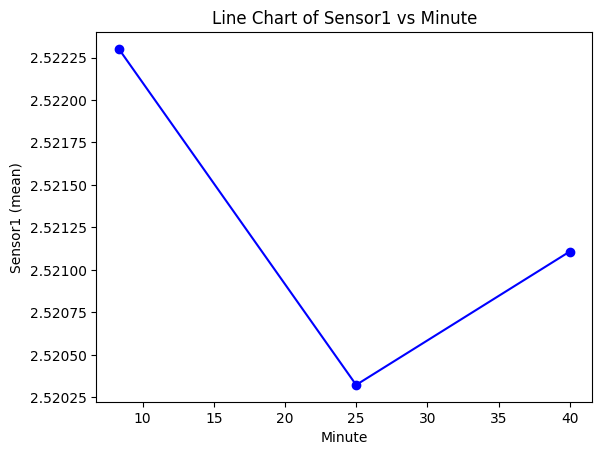

In [223]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [224]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df['minute'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.minute
df['second'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df = df.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df)

        sensor1   sensor2        time_x   speedSet  load_value  \
50000  2.520344  2.433617  20:00.000000  25.000000           0   
50001  2.521165  2.423597  20:00.000000  25.000000           0   
50002  2.517716  2.424090  20:00.000000  25.000000           0   
50003  2.523629  2.436738  20:00.000000  25.000000           0   
50004  2.516730  2.431153  20:00.000000  25.000000           0   
...         ...       ...           ...        ...         ...   
49995  2.522151  2.433781  34:22.000000   8.332031          80   
49996  2.521494  2.430168  34:22.000000   8.332031          80   
49997  2.521822  2.429675  34:22.000000   8.332031          80   
49998  2.521165  2.429675  34:22.000000   8.332031          80   
49999  2.521822  2.433124  34:22.000000   8.332031          80   

      gear_fault_desc  time_x_seconds  minute  second  
50000    eccentricity          1200.0      20       0  
50001    eccentricity          1200.0      20       0  
50002    eccentricity          1200.0  

In [225]:
sorted_df = df.sort_values(by='minute')
sorted_df = df.sort_values(by='second')

In [226]:
sorted_df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
50000,2.520344,2.433617,20:00.000000,25.0,0,eccentricity,1200.0,20,0
53173,2.514431,2.427375,20:00.600000,25.0,0,eccentricity,1200.6,20,0
53172,2.521001,2.428853,20:00.600000,25.0,0,eccentricity,1200.6,20,0
53171,2.525600,2.430825,20:00.600000,25.0,0,eccentricity,1200.6,20,0
53170,2.517223,2.429839,20:00.600000,25.0,0,eccentricity,1200.6,20,0


In [227]:
df = sorted_df

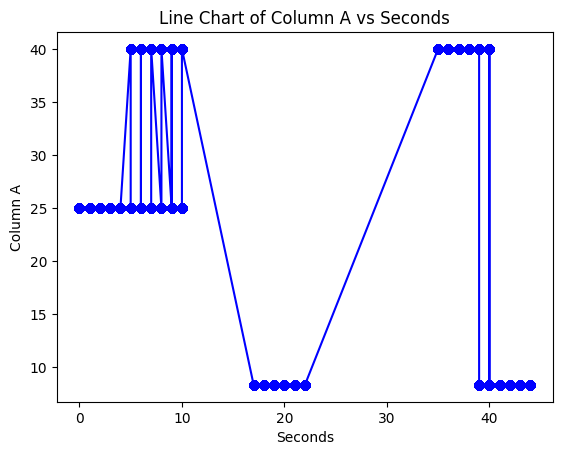

In [228]:
plt.plot(df['second'], df['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

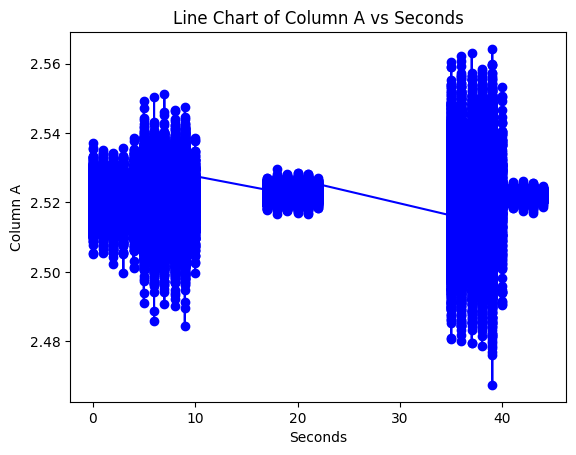

In [229]:
plt.plot(df['second'], df['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [230]:
df.tail()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
24841,2.521822,2.430660,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24842,2.520508,2.430660,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24843,2.521658,2.431974,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24830,2.522151,2.431153,31:44.000000,8.332031,0,eccentricity,1904.0,31,44
24999,2.520673,2.430989,31:44.000000,8.332031,0,eccentricity,1904.0,31,44


In [231]:
print(df.dtypes)

sensor1            float64
sensor2            float64
time_x              object
speedSet           float64
load_value           int64
gear_fault_desc     object
time_x_seconds     float64
minute               int32
second               int32
dtype: object


In [232]:
#Missing values
print(df.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


In [233]:
df.isna().sum().sum()

0

In [234]:
# Unique values for categorical columns
print(df['gear_fault_desc'].nunique())

1


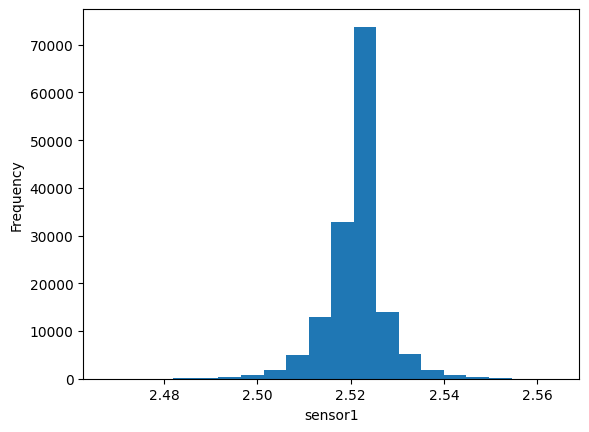

In [235]:
# Distribution of numerical columns
plt.hist(df['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

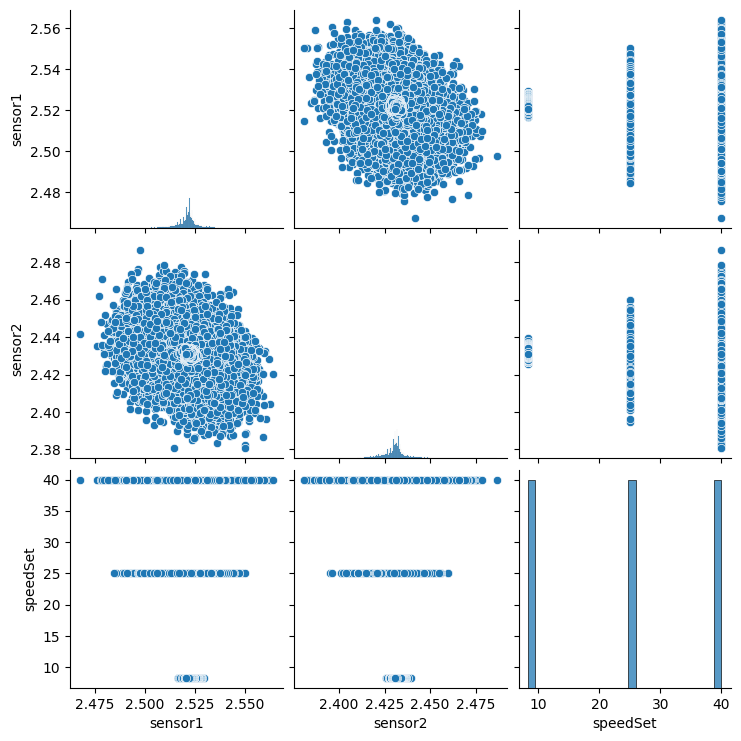

In [236]:
# Relationships between variables
sns.pairplot(df[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [237]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

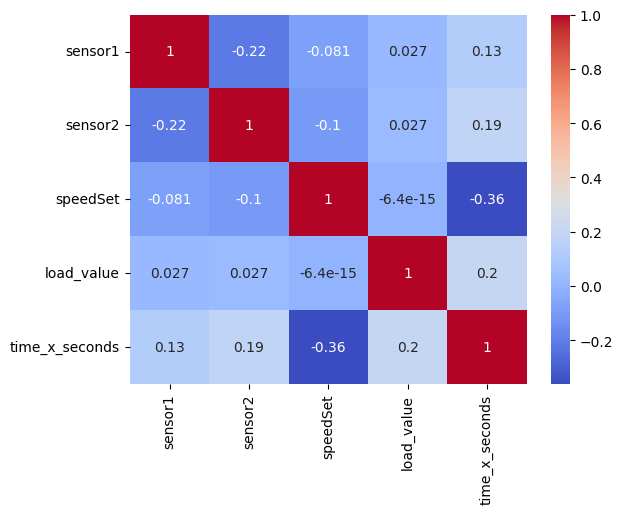

In [238]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [239]:
print(df['time_x'].iloc[0])

20:00.000000


In [240]:
# Assuming df is your DataFrame
df = pd.read_csv('/content/eccentricity.csv')

In [241]:
print(df)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.522315  2.431974  31:39.0   8.332031           0    eccentricity
1       2.523629  2.431317  31:39.0   8.332031           0    eccentricity
2       2.522644  2.428032  31:39.0   8.332031           0    eccentricity
3       2.521987  2.430660  31:39.0   8.332031           0    eccentricity
4       2.522808  2.430168  31:39.0   8.332031           0    eccentricity
...          ...       ...      ...        ...         ...             ...
149995  2.525272  2.451028  29:40.0  40.000000          80    eccentricity
149996  2.529542  2.442815  29:40.0  40.000000          80    eccentricity
149997  2.519851  2.447579  29:40.0  40.000000          80    eccentricity
149998  2.516073  2.431153  29:40.0  40.000000          80    eccentricity
149999  2.517059  2.442979  29:40.0  40.000000          80    eccentricity

[150000 rows x 6 columns]


# **ROOT CRACK**

In [242]:
df2 = pd.read_csv('/content/root_crack.csv')

In [243]:
print(df2)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.519358  2.429675  41:31.0   8.332031           0      Root crack
1       2.519358  2.429839  41:31.0   8.332031           0      Root crack
2       2.521165  2.430496  41:31.0   8.332031           0      Root crack
3       2.520508  2.428853  41:31.0   8.332031           0      Root crack
4       2.519358  2.428689  41:31.0   8.332031           0      Root crack
...          ...       ...      ...        ...         ...             ...
149995  2.545968  2.424911  03:42.0  40.000000          80      Root crack
149996  2.507532  2.427539  03:42.0  40.000000          80      Root crack
149997  2.530035  2.439530  03:42.0  40.000000          80      Root crack
149998  2.534634  2.443801  03:42.0  40.000000          80      Root crack
149999  2.507696  2.436081  03:42.0  40.000000          80      Root crack

[150000 rows x 6 columns]


In [244]:
df2['time_x'].head()

0    41:31.0
1    41:31.0
2    41:31.0
3    41:31.0
4    41:31.0
Name: time_x, dtype: object

In [245]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['time_x'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [246]:
# Convert 'time_x' to seconds
df2['time_x_seconds'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df2 = df2[(df2['time_x_seconds'] >= 39) & (df2['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df2)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [247]:
df2.head(50)

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds
0,2.519358,2.429675,41:31.000000,8.332031,0,Root crack,2491.0
1,2.519358,2.429839,41:31.000000,8.332031,0,Root crack,2491.0
2,2.521165,2.430496,41:31.000000,8.332031,0,Root crack,2491.0
3,2.520508,2.428853,41:31.000000,8.332031,0,Root crack,2491.0
4,2.519358,2.428689,41:31.000000,8.332031,0,Root crack,2491.0
5,2.520837,2.429839,41:31.000000,8.332031,0,Root crack,2491.0
6,2.520180,2.429675,41:31.000000,8.332031,0,Root crack,2491.0
7,2.522151,2.429346,41:31.000000,8.332031,0,Root crack,2491.0
8,2.520837,2.428525,41:31.000000,8.332031,0,Root crack,2491.0
9,2.520344,2.429018,41:31.000000,8.332031,0,Root crack,2491.0


In [248]:
df2.shape

(150000, 7)

In [249]:
df2.describe

<bound method NDFrame.describe of          sensor1   sensor2        time_x   speedSet  load_value  \
0       2.519358  2.429675  41:31.000000   8.332031           0   
1       2.519358  2.429839  41:31.000000   8.332031           0   
2       2.521165  2.430496  41:31.000000   8.332031           0   
3       2.520508  2.428853  41:31.000000   8.332031           0   
4       2.519358  2.428689  41:31.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.545968  2.424911  03:42.000000  40.000000          80   
149996  2.507532  2.427539  03:42.000000  40.000000          80   
149997  2.530035  2.439530  03:42.000000  40.000000          80   
149998  2.534634  2.443801  03:42.000000  40.000000          80   
149999  2.507696  2.436081  03:42.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0           Root crack          2491.0  
1           Root crack          2491.0  
2           Root crack          2491.0  
3           Root crack          2491.0  
4           Root crack          2491.0  
...                ...             ...  
149995      Root crack           222.0  
149996      Root crack           222.0  
149997      Root crack           222.0  
149998      Root crack           222.0  
149999      Root crack           222.0  

[150000 rows x 7 columns]>

In [250]:
df2.columns

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'time_x_seconds'],
      dtype='object')

In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
 6   time_x_seconds   150000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.0+ MB


In [252]:
# Remove rows with NaN values
df2_cleaned = df2.dropna()
print(df2_cleaned)

         sensor1   sensor2        time_x   speedSet  load_value  \
0       2.519358  2.429675  41:31.000000   8.332031           0   
1       2.519358  2.429839  41:31.000000   8.332031           0   
2       2.521165  2.430496  41:31.000000   8.332031           0   
3       2.520508  2.428853  41:31.000000   8.332031           0   
4       2.519358  2.428689  41:31.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.545968  2.424911  03:42.000000  40.000000          80   
149996  2.507532  2.427539  03:42.000000  40.000000          80   
149997  2.530035  2.439530  03:42.000000  40.000000          80   
149998  2.534634  2.443801  03:42.000000  40.000000          80   
149999  2.507696  2.436081  03:42.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0           Root crack          2491.0  
1           Root crack          2491.0  
2           Root crack          2491.0  
3           Root crack         

In [253]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['minute'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df2['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
1     25000
3     25000
41    50000
55    25000
59    25000
Name: count, dtype: int64


In [254]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df2['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
1     25000
3     25000
41    50000
55    25000
59    25000
Name: count, dtype: int64


In [255]:
df2['minute'].value_counts().sort_index()

minute
1     25000
3     25000
41    50000
55    25000
59    25000
Name: count, dtype: int64

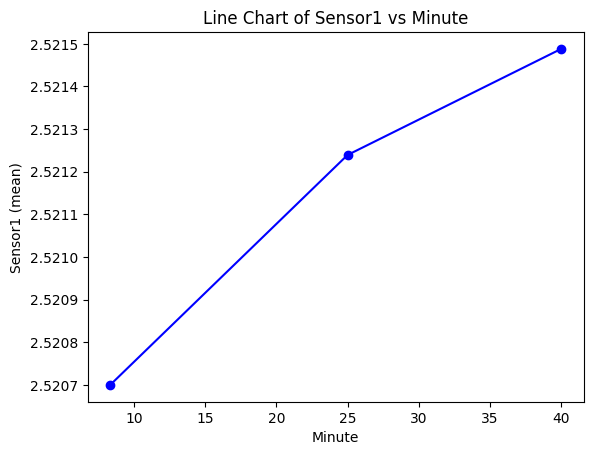

In [256]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df2.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [257]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df2['minute'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.minute
df2['second'] = pd.to_datetime(df2['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df2 = df2.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df2)

         sensor1   sensor2        time_x  speedSet  load_value  \
100000  2.525272  2.427211  01:03.000000      40.0           0   
100001  2.524286  2.427047  01:03.000000      40.0           0   
100002  2.528228  2.431974  01:03.000000      40.0           0   
100003  2.525929  2.433124  01:03.000000      40.0           0   
100004  2.515745  2.430496  01:03.000000      40.0           0   
...          ...       ...           ...       ...         ...   
74995   2.525600  2.429675  59:12.000000      25.0           0   
74996   2.514267  2.431317  59:12.000000      25.0           0   
74997   2.531349  2.423433  59:12.000000      25.0           0   
74998   2.510653  2.433288  59:12.000000      25.0           0   
74999   2.525272  2.431974  59:12.000000      25.0           0   

       gear_fault_desc  time_x_seconds  minute  second  
100000      Root crack            63.0       1       3  
100001      Root crack            63.0       1       3  
100002      Root crack            63

In [258]:
sorted_df2 = df2.sort_values(by='minute')
sorted_df2 = df2.sort_values(by='second')

In [259]:
sorted_df2.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
100001,2.524286,2.427047,01:03.000000,40.0,0,Root crack,63.0,1,3
103668,2.525436,2.431646,01:03.700000,40.0,0,Root crack,63.7,1,3
103667,2.523136,2.435752,01:03.700000,40.0,0,Root crack,63.7,1,3
103666,2.518044,2.432631,01:03.700000,40.0,0,Root crack,63.7,1,3
103665,2.523301,2.429839,01:03.700000,40.0,0,Root crack,63.7,1,3


In [260]:
df2 = sorted_df2

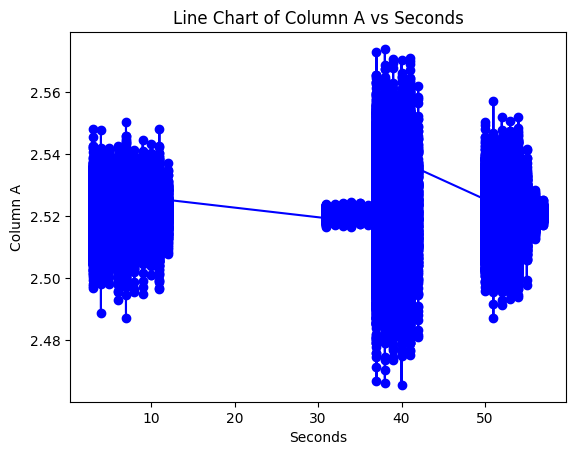

In [261]:
plt.plot(df2['second'], df2['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

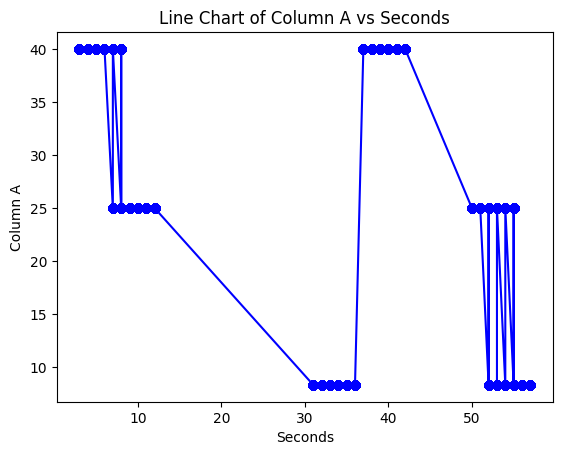

In [262]:
plt.plot(df2['second'], df2['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [263]:
df2.tail()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc,time_x_seconds,minute,second
49840,2.519358,2.431482,41:57.000000,8.332031,80,Root crack,2517.0,41,57
49841,2.519851,2.430332,41:57.000000,8.332031,80,Root crack,2517.0,41,57
49842,2.520016,2.430496,41:57.000000,8.332031,80,Root crack,2517.0,41,57
49829,2.522808,2.429511,41:57.000000,8.332031,80,Root crack,2517.0,41,57
49998,2.522315,2.428525,41:57.000000,8.332031,80,Root crack,2517.0,41,57


In [264]:
print(df2.dtypes)

sensor1            float64
sensor2            float64
time_x              object
speedSet           float64
load_value           int64
gear_fault_desc     object
time_x_seconds     float64
minute               int32
second               int32
dtype: object


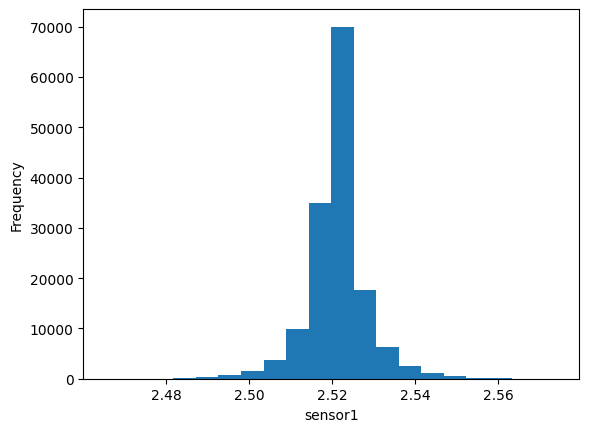

In [265]:
# Distribution of numerical columns
plt.hist(df2['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

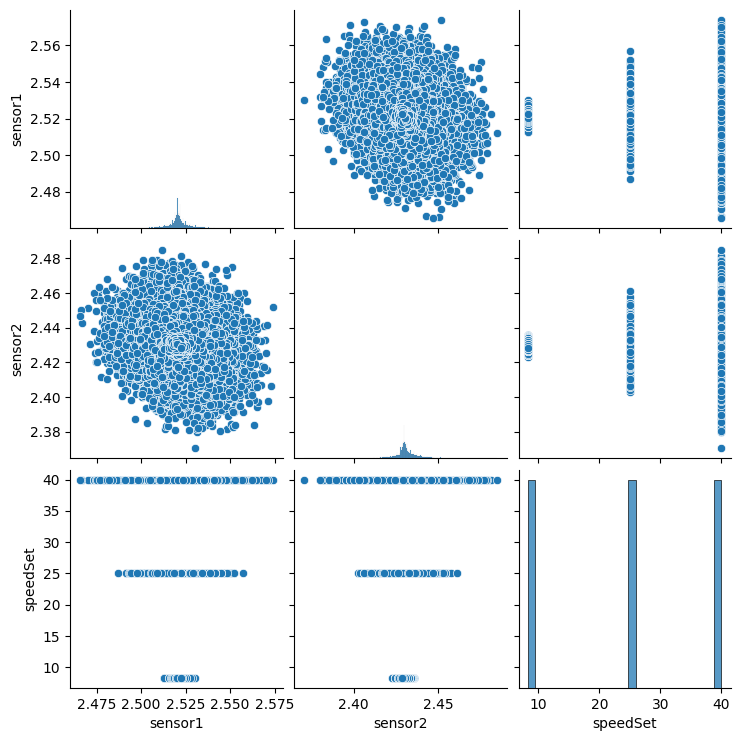

In [266]:
# Relationships between variables
sns.pairplot(df2[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [267]:
# Select only numeric columns
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])

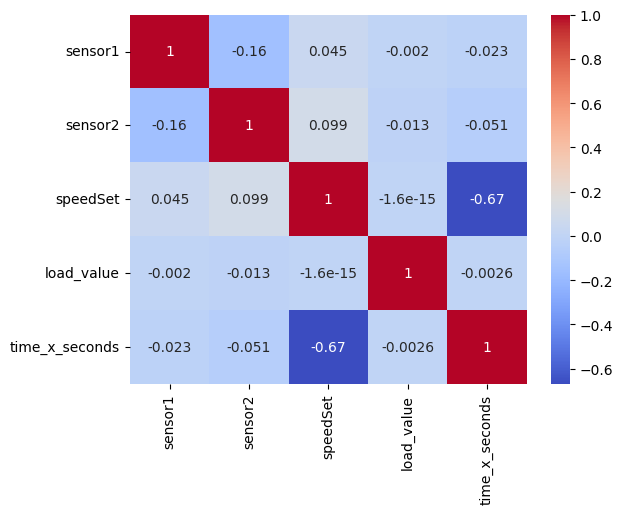

In [268]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [269]:
print(df2['time_x'].iloc[0])

01:03.000000


# **SURFACE FAULT**

In [270]:
df3 = pd.read_csv('/content/surface_fault.csv')

In [271]:
print(df3)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.521001  2.427539  35:14.0   8.332031           0  surface defect
1       2.519851  2.428196  35:14.0   8.332031           0  surface defect
2       2.520016  2.426225  35:14.0   8.332031           0  surface defect
3       2.520016  2.428689  35:14.0   8.332031           0  surface defect
4       2.521165  2.427047  35:14.0   8.332031           0  surface defect
...          ...       ...      ...        ...         ...             ...
149995  2.502769  2.438052  10:16.0  40.000000          80  surface defect
149996  2.506382  2.357074  10:16.0  40.000000          80  surface defect
149997  2.511638  2.457598  10:16.0  40.000000          80  surface defect
149998  2.552210  2.387625  10:16.0  40.000000          80  surface defect
149999  2.503426  2.422119  10:16.0  40.000000          80  surface defect

[150000 rows x 6 columns]


In [272]:
print(df3.head())

    sensor1   sensor2   time_x  speedSet  load_value gear_fault_desc
0  2.521001  2.427539  35:14.0  8.332031           0  surface defect
1  2.519851  2.428196  35:14.0  8.332031           0  surface defect
2  2.520016  2.426225  35:14.0  8.332031           0  surface defect
3  2.520016  2.428689  35:14.0  8.332031           0  surface defect
4  2.521165  2.427047  35:14.0  8.332031           0  surface defect


In [273]:
df3['time_x'].head()

0    35:14.0
1    35:14.0
2    35:14.0
3    35:14.0
4    35:14.0
Name: time_x, dtype: object

In [274]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['time_x'] = pd.to_datetime(df['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [275]:
# Convert 'time_x' to seconds
df3['time_x_seconds'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df3 = df3[(df3['time_x_seconds'] >= 39) & (df3['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df3)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [276]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
 6   time_x_seconds   150000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.0+ MB


In [277]:
# Remove rows with NaN values
df3_cleaned = df3.dropna()
print(df3_cleaned)

         sensor1   sensor2        time_x   speedSet  load_value  \
0       2.521001  2.427539  31:39.000000   8.332031           0   
1       2.519851  2.428196  31:39.000000   8.332031           0   
2       2.520016  2.426225  31:39.000000   8.332031           0   
3       2.520016  2.428689  31:39.000000   8.332031           0   
4       2.521165  2.427047  31:39.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.502769  2.438052  29:40.000000  40.000000          80   
149996  2.506382  2.357074  29:40.000000  40.000000          80   
149997  2.511638  2.457598  29:40.000000  40.000000          80   
149998  2.552210  2.387625  29:40.000000  40.000000          80   
149999  2.503426  2.422119  29:40.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0       surface defect          1899.0  
1       surface defect          1899.0  
2       surface defect          1899.0  
3       surface defect         

In [278]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['minute'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df3['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64


In [279]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df3['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64


In [280]:
df3['minute'].value_counts().sort_index()

minute
20    25000
22    25000
28    25000
29    25000
31    25000
34    25000
Name: count, dtype: int64

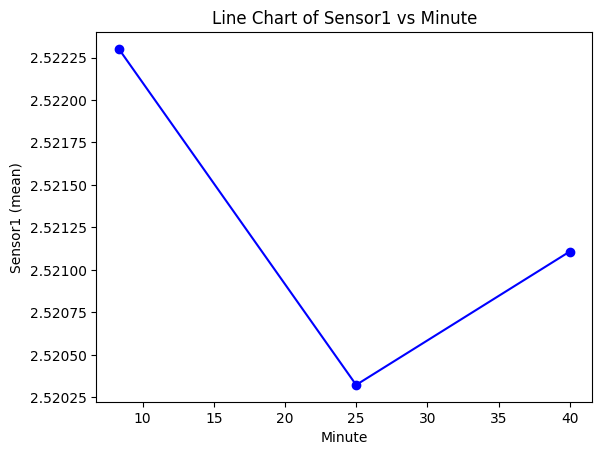

In [281]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [282]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df3['minute'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.minute
df3['second'] = pd.to_datetime(df3['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df3 = df3.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df3)

        sensor1   sensor2        time_x   speedSet  load_value  \
50000  2.528393  2.438709  20:00.000000  25.000000           0   
50001  2.521494  2.439859  20:00.000000  25.000000           0   
50002  2.513117  2.411442  20:00.000000  25.000000           0   
50003  2.529214  2.419327  20:00.000000  25.000000           0   
50004  2.511638  2.428032  20:00.000000  25.000000           0   
...         ...       ...           ...        ...         ...   
49995  2.517223  2.429675  34:22.000000   8.332031          80   
49996  2.521822  2.428853  34:22.000000   8.332031          80   
49997  2.517387  2.428361  34:22.000000   8.332031          80   
49998  2.519358  2.429182  34:22.000000   8.332031          80   
49999  2.518701  2.429182  34:22.000000   8.332031          80   

      gear_fault_desc  time_x_seconds  minute  second  
50000  surface defect          1200.0      20       0  
50001  surface defect          1200.0      20       0  
50002  surface defect          1200.0  

In [283]:
df3 = sorted_df3

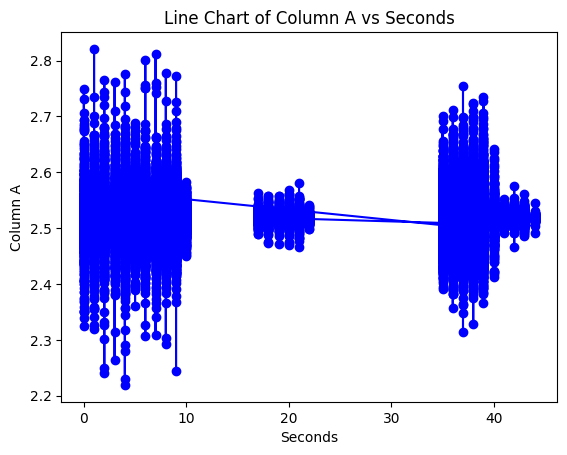

In [284]:
plt.plot(df3['second'], df3['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

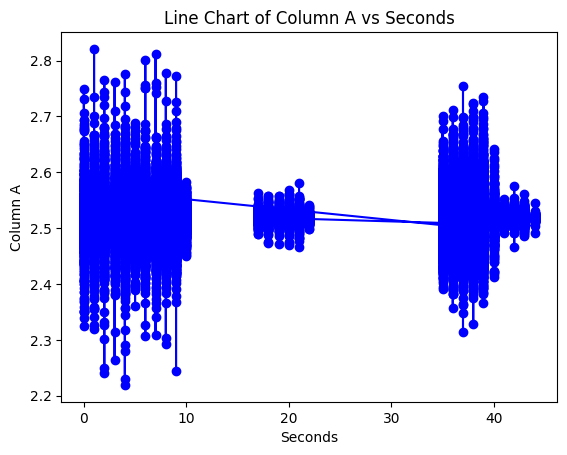

In [285]:
plt.plot(df3['second'], df3['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

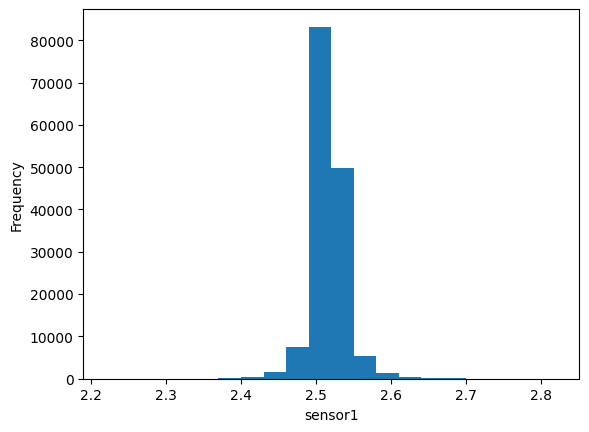

In [286]:
# Distribution of numerical columns
plt.hist(df3['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

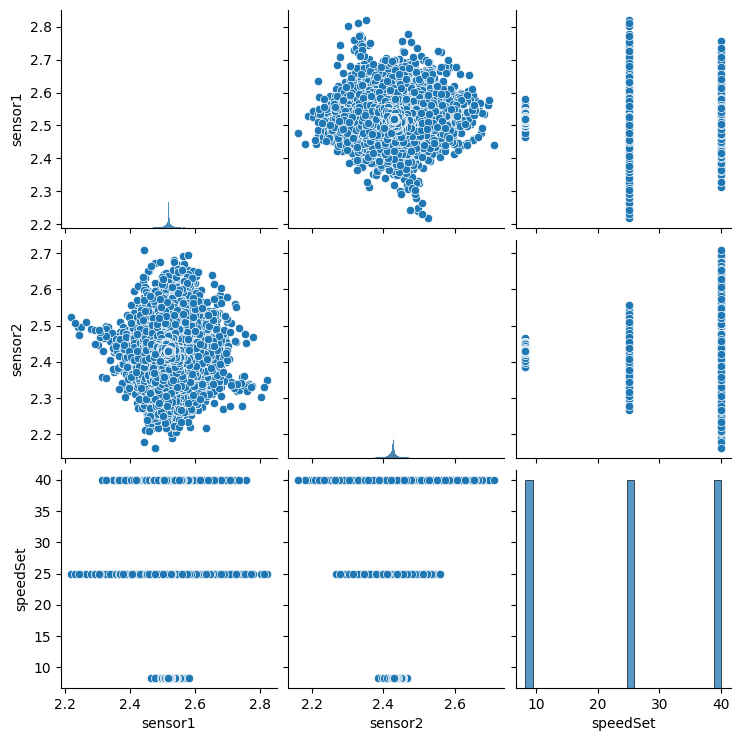

In [287]:
# Relationships between variables
sns.pairplot(df3[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [288]:
# Select only numeric columns
numeric_cols = df3.select_dtypes(include=['float64', 'int64'])

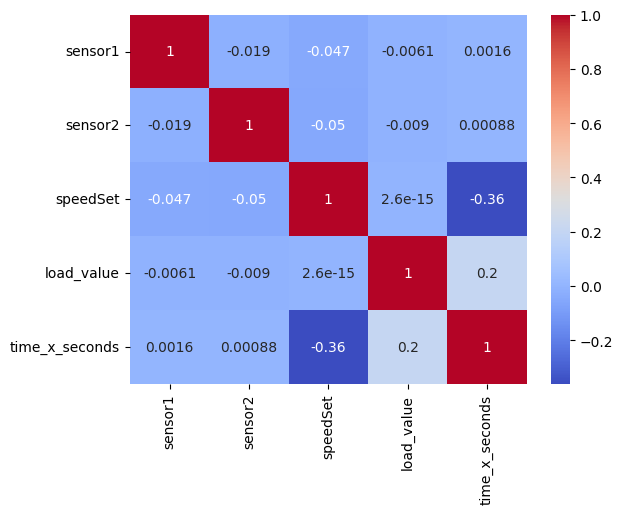

In [289]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [290]:
print(df3['time_x'].iloc[0])

20:00.000000


# **TOOTH CHIPPED FAULT**

In [291]:
df4 = pd.read_csv('/content/tooth_chipped_fault.csv')

In [292]:
print(df4)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.518209  2.430496  53:07.0   8.332031           0   chipped tooth
1       2.517880  2.429839  53:07.0   8.332031           0   chipped tooth
2       2.516402  2.427211  53:07.0   8.332031           0   chipped tooth
3       2.518537  2.427704  53:07.0   8.332031           0   chipped tooth
4       2.518701  2.427539  53:07.0   8.332031           0   chipped tooth
...          ...       ...      ...        ...         ...             ...
149995  2.513281  2.436245  40:24.0  40.000000          80   chipped tooth
149996  2.521822  2.429018  40:24.0  40.000000          80   chipped tooth
149997  2.500962  2.417520  40:24.0  40.000000          80   chipped tooth
149998  2.518209  2.410457  40:24.0  40.000000          80   chipped tooth
149999  2.536934  2.440680  40:24.0  40.000000          80   chipped tooth

[150000 rows x 6 columns]


In [293]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['time_x'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [294]:
# Convert 'time_x' to seconds
df4['time_x_seconds'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df4 = df4[(df4['time_x_seconds'] >= 39) & (df4['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df4)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [295]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
 6   time_x_seconds   150000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.0+ MB


In [296]:
# Remove rows with NaN values
df4_cleaned = df4.dropna()
print(df4_cleaned)

         sensor1   sensor2        time_x   speedSet  load_value  \
0       2.518209  2.430496  53:07.000000   8.332031           0   
1       2.517880  2.429839  53:07.000000   8.332031           0   
2       2.516402  2.427211  53:07.000000   8.332031           0   
3       2.518537  2.427704  53:07.000000   8.332031           0   
4       2.518701  2.427539  53:07.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.513281  2.436245  40:24.000000  40.000000          80   
149996  2.521822  2.429018  40:24.000000  40.000000          80   
149997  2.500962  2.417520  40:24.000000  40.000000          80   
149998  2.518209  2.410457  40:24.000000  40.000000          80   
149999  2.536934  2.440680  40:24.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0        chipped tooth          3187.0  
1        chipped tooth          3187.0  
2        chipped tooth          3187.0  
3        chipped tooth         

In [297]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['minute'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df4['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
4     25000
31     9753
32    15247
40    25000
53    25000
54    25000
55    25000
Name: count, dtype: int64


In [298]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df4['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
4     25000
31     9753
32    15247
40    25000
53    25000
54    25000
55    25000
Name: count, dtype: int64


In [299]:
df4['minute'].value_counts().sort_index()

minute
4     25000
31     9753
32    15247
40    25000
53    25000
54    25000
55    25000
Name: count, dtype: int64

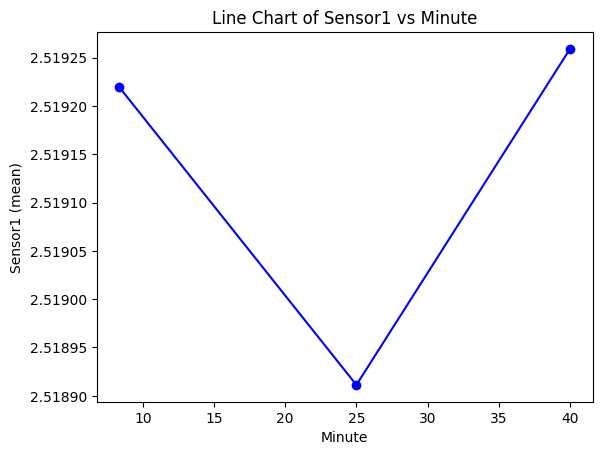

In [300]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df4.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [301]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df4['minute'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.minute
df4['second'] = pd.to_datetime(df4['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df4 = df4.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df4)

         sensor1   sensor2        time_x   speedSet  load_value  \
25000   2.519194  2.430496  04:29.000000   8.332031          80   
25001   2.519194  2.430989  04:29.000000   8.332031          80   
25002   2.520016  2.431317  04:29.000000   8.332031          80   
25003   2.519358  2.430496  04:29.000000   8.332031          80   
25004   2.519030  2.430989  04:29.000000   8.332031          80   
...          ...       ...           ...        ...         ...   
124995  2.521987  2.419162  55:06.000000  40.000000           0   
124996  2.517716  2.428196  55:06.000000  40.000000           0   
124997  2.518044  2.430003  55:06.000000  40.000000           0   
124998  2.519030  2.427375  55:06.000000  40.000000           0   
124999  2.520344  2.420476  55:06.000000  40.000000           0   

       gear_fault_desc  time_x_seconds  minute  second  
25000    chipped tooth           269.0       4      29  
25001    chipped tooth           269.0       4      29  
25002    chipped tooth  

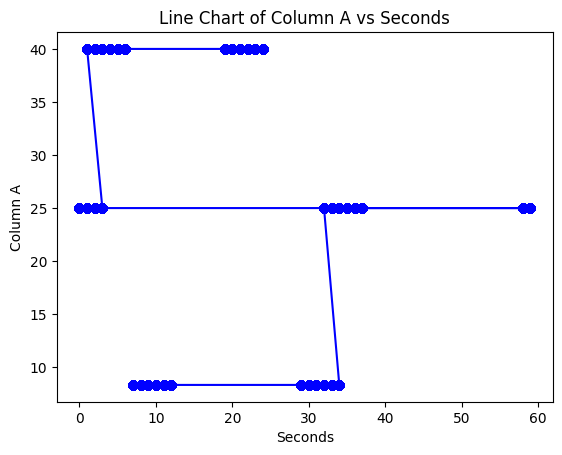

In [302]:
plt.plot(df4['second'], df4['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

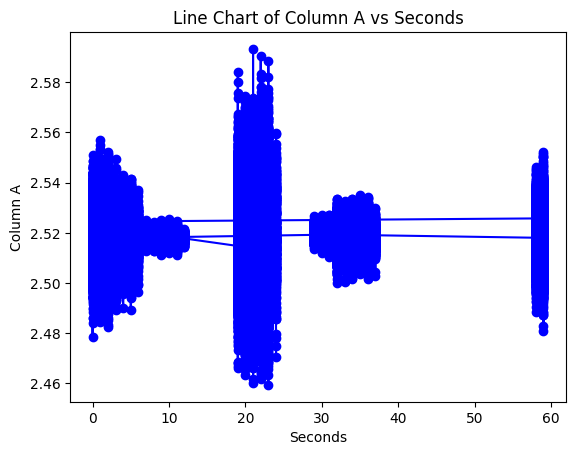

In [303]:
plt.plot(df4['second'], df4['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [304]:
#Missing values
print(df4.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


In [305]:
# Unique values for categorical columns
print(df4['gear_fault_desc'].nunique())

1


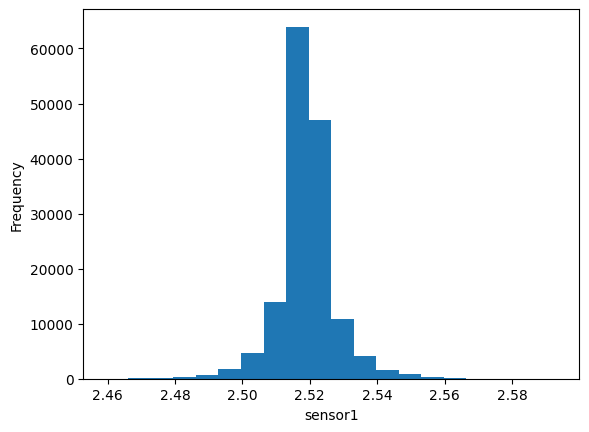

In [306]:
# Distribution of numerical columns
plt.hist(df4['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

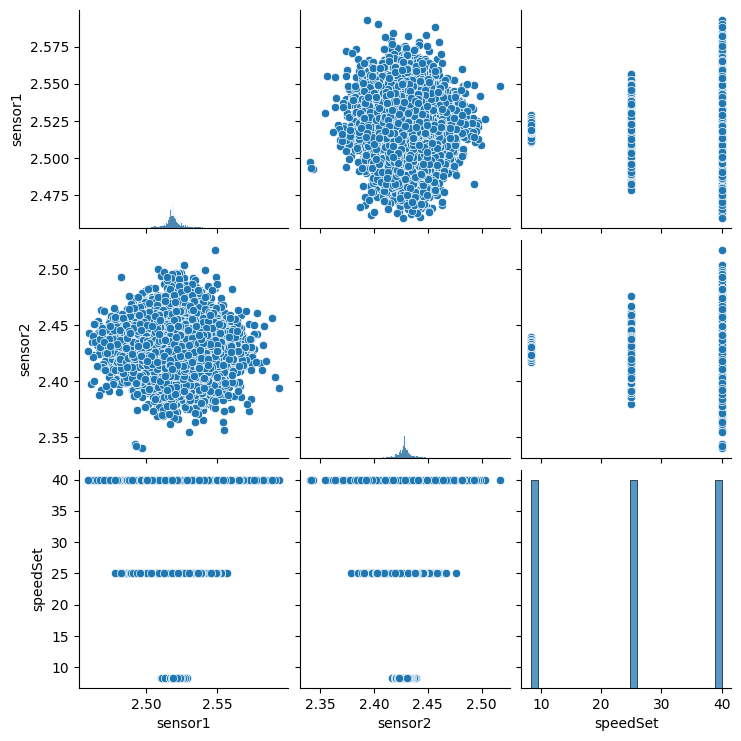

In [307]:
# Relationships between variables
sns.pairplot(df4[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [308]:
# Select only numeric columns
numeric_cols = df4.select_dtypes(include=['float64', 'int64'])

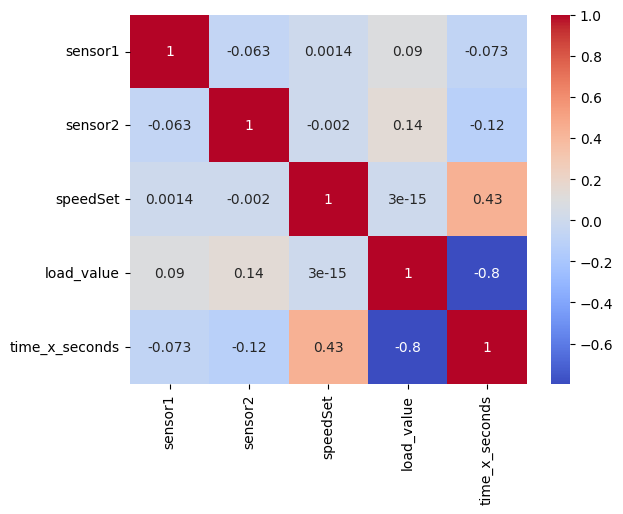

In [309]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [310]:
print(df4['time_x'].iloc[0])

53:07.000000


# **MISSING TOOTH**

In [311]:
df5 = pd.read_csv('/content/missing_tooth.csv')

In [312]:
print(df5)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.520016  2.430496  06:37.0   8.332031           0   missing tooth
1       2.521822  2.430660  06:37.0   8.332031           0   missing tooth
2       2.519194  2.429511  06:37.0   8.332031           0   missing tooth
3       2.519851  2.428853  06:37.0   8.332031           0   missing tooth
4       2.518701  2.429346  06:37.0   8.332031           0   missing tooth
...          ...       ...      ...        ...         ...             ...
149995  2.530692  2.437888  26:55.0  40.000000          80   missing tooth
149996  2.516566  2.446593  26:55.0  40.000000          80   missing tooth
149997  2.488643  2.418505  26:55.0  40.000000          80   missing tooth
149998  2.529542  2.430003  26:55.0  40.000000          80   missing tooth
149999  2.498334  2.427704  26:55.0  40.000000          80   missing tooth

[150000 rows x 6 columns]


In [313]:
# Remove rows with NaN values
df5_cleaned = df5.dropna()
print(df5_cleaned)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.520016  2.430496  06:37.0   8.332031           0   missing tooth
1       2.521822  2.430660  06:37.0   8.332031           0   missing tooth
2       2.519194  2.429511  06:37.0   8.332031           0   missing tooth
3       2.519851  2.428853  06:37.0   8.332031           0   missing tooth
4       2.518701  2.429346  06:37.0   8.332031           0   missing tooth
...          ...       ...      ...        ...         ...             ...
149995  2.530692  2.437888  26:55.0  40.000000          80   missing tooth
149996  2.516566  2.446593  26:55.0  40.000000          80   missing tooth
149997  2.488643  2.418505  26:55.0  40.000000          80   missing tooth
149998  2.529542  2.430003  26:55.0  40.000000          80   missing tooth
149999  2.498334  2.427704  26:55.0  40.000000          80   missing tooth

[150000 rows x 6 columns]


In [314]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['time_x'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [315]:
# Convert 'time_x' to seconds
df5['time_x_seconds'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df5 = df5[(df5['time_x_seconds'] >= 39) & (df5['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df5)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [316]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['minute'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df5['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
6     25000
7     25000
26    25000
28    25000
33    25000
35    25000
Name: count, dtype: int64


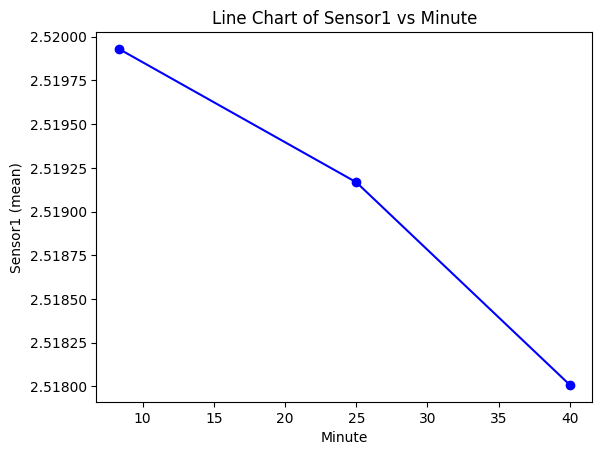

In [317]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df5.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [318]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df5['minute'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.minute
df5['second'] = pd.to_datetime(df5['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df5 = df5.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df5)

        sensor1   sensor2        time_x   speedSet  load_value  \
0      2.520016  2.430496  06:37.000000   8.332031           0   
1      2.521822  2.430660  06:37.000000   8.332031           0   
2      2.519194  2.429511  06:37.000000   8.332031           0   
3      2.519851  2.428853  06:37.000000   8.332031           0   
4      2.518701  2.429346  06:37.000000   8.332031           0   
...         ...       ...           ...        ...         ...   
99995  2.516566  2.432960  35:23.000000  25.000000          80   
99996  2.507204  2.414563  35:23.000000  25.000000          80   
99997  2.502933  2.417684  35:23.000000  25.000000          80   
99998  2.518044  2.427539  35:23.000000  25.000000          80   
99999  2.510981  2.430168  35:23.000000  25.000000          80   

      gear_fault_desc  time_x_seconds  minute  second  
0       missing tooth           397.0       6      37  
1       missing tooth           397.0       6      37  
2       missing tooth           397.0  

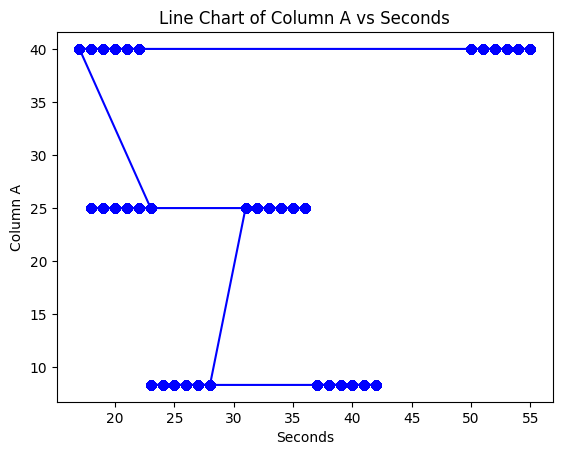

In [319]:
plt.plot(df5['second'], df5['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [320]:
#Missing values
print(df5.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


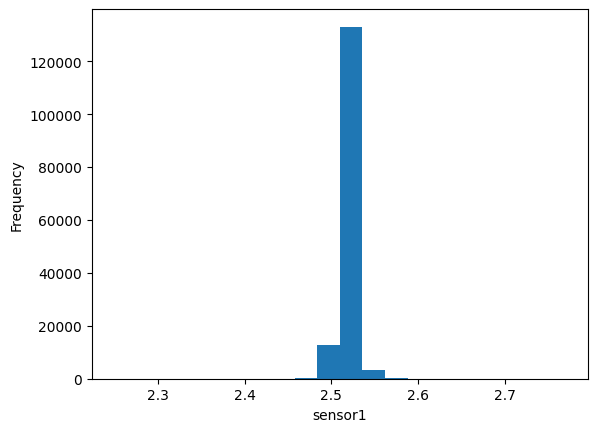

In [321]:
# Distribution of numerical columns
plt.hist(df5['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

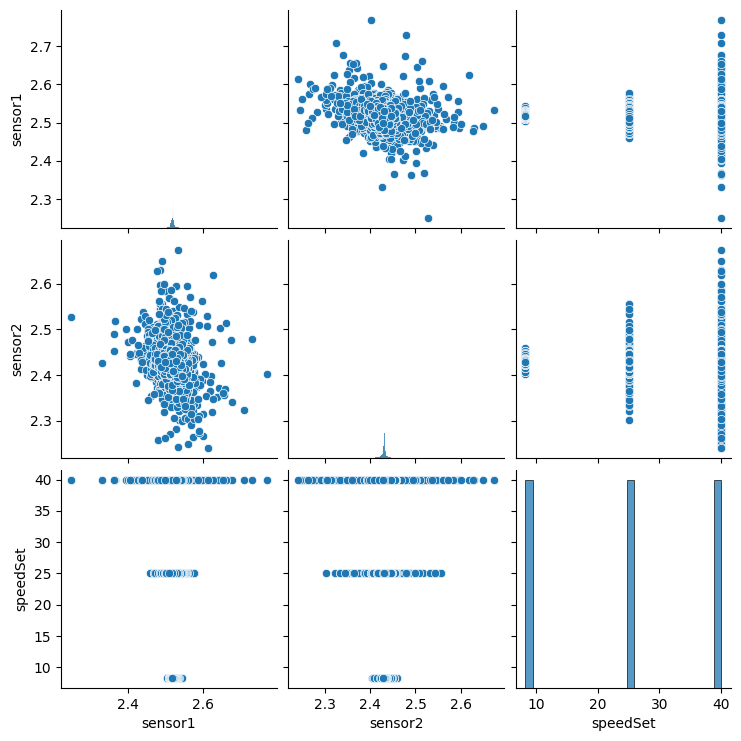

In [322]:
# Relationships between variables
sns.pairplot(df5[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [323]:
# Select only numeric columns
numeric_cols = df5.select_dtypes(include=['float64', 'int64'])

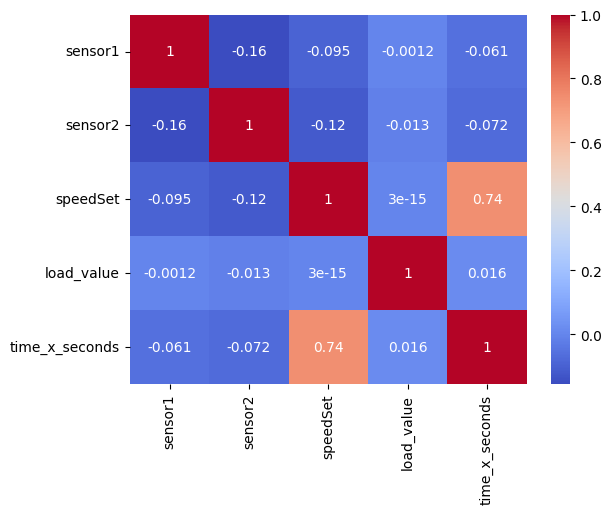

In [324]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [325]:
print(df5['time_x'].iloc[0])

06:37.000000


# **NO FAULT**

In [326]:
df6 = pd.read_csv('/content/no_fault.csv')

In [327]:
print(df6)

         sensor1   sensor2   time_x   speedSet  load_value gear_fault_desc
0       2.523465  2.430168  47:31.0   8.332031           0        No fault
1       2.521494  2.430003  47:31.0   8.332031           0        No fault
2       2.522479  2.429675  47:31.0   8.332031           0        No fault
3       2.521330  2.431810  47:31.0   8.332031           0        No fault
4       2.522479  2.431317  47:31.0   8.332031           0        No fault
...          ...       ...      ...        ...         ...             ...
149995  2.549417  2.441830  06:07.0  40.000000          80        No fault
149996  2.496363  2.453820  06:07.0  40.000000          80        No fault
149997  2.520837  2.418505  06:07.0  40.000000          80        No fault
149998  2.499319  2.417027  06:07.0  40.000000          80        No fault
149999  2.515088  2.419984  06:07.0  40.000000          80        No fault

[150000 rows x 6 columns]


In [328]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['time_x'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.strftime('%M:%S.%f')

In [329]:
# Convert 'time_x' to seconds
df6['time_x_seconds'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute * 60 + pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.second + pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.microsecond / 1e6

# Filter rows where 'time_x_seconds' is between 39 and 40
filtered_df6 = df6[(df6['time_x_seconds'] >= 39) & (df6['time_x_seconds'] < 40)]

# Display the filtered DataFrame
print(filtered_df6)

Empty DataFrame
Columns: [sensor1, sensor2, time_x, speedSet, load_value, gear_fault_desc, time_x_seconds]
Index: []


In [330]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sensor1          150000 non-null  float64
 1   sensor2          150000 non-null  float64
 2   time_x           150000 non-null  object 
 3   speedSet         150000 non-null  float64
 4   load_value       150000 non-null  int64  
 5   gear_fault_desc  150000 non-null  object 
 6   time_x_seconds   150000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.0+ MB


In [331]:
# Remove rows with NaN values
df6_cleaned = df6.dropna()
print(df6_cleaned)

         sensor1   sensor2        time_x   speedSet  load_value  \
0       2.523465  2.430168  47:31.000000   8.332031           0   
1       2.521494  2.430003  47:31.000000   8.332031           0   
2       2.522479  2.429675  47:31.000000   8.332031           0   
3       2.521330  2.431810  47:31.000000   8.332031           0   
4       2.522479  2.431317  47:31.000000   8.332031           0   
...          ...       ...           ...        ...         ...   
149995  2.549417  2.441830  06:07.000000  40.000000          80   
149996  2.496363  2.453820  06:07.000000  40.000000          80   
149997  2.520837  2.418505  06:07.000000  40.000000          80   
149998  2.499319  2.417027  06:07.000000  40.000000          80   
149999  2.515088  2.419984  06:07.000000  40.000000          80   

       gear_fault_desc  time_x_seconds  
0             No fault          2851.0  
1             No fault          2851.0  
2             No fault          2851.0  
3             No fault         

In [332]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['minute'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute

# Counting occurrences of each unique minute value and sorting by minute values
minute_counts = df6['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)


minute
6     25000
10    25000
29    25000
30    25000
47    25000
49    25000
Name: count, dtype: int64


In [333]:
# Assuming you have a 'minute' column in your DataFrame
minute_counts = df6['minute'].value_counts().sort_index()

# Display the counts sorted by minute values
print(minute_counts)

minute
6     25000
10    25000
29    25000
30    25000
47    25000
49    25000
Name: count, dtype: int64


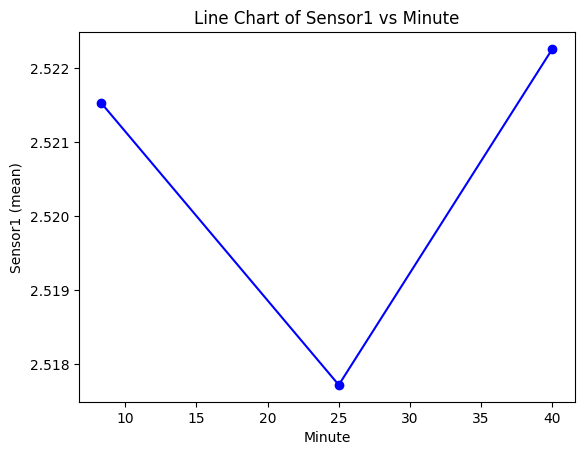

In [334]:
import matplotlib.pyplot as plt


minute_sensor1_mean = df6.groupby('speedSet')['sensor1'].mean()


plt.plot(minute_sensor1_mean.index, minute_sensor1_mean.values, color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Sensor1 vs Minute')
plt.xlabel('Minute')
plt.ylabel('Sensor1 (mean)')


plt.show()

In [335]:
# Assuming 'time_x' is in the format 'MM:SS.S'
df6['minute'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.minute
df6['second'] = pd.to_datetime(df6['time_x'], format='%M:%S.%f').dt.second

# Sort by 'minute' and then by 'second'
sorted_df6 = df6.sort_values(by=['minute', 'second'])

# Display the sorted DataFrame
print(sorted_df6)

         sensor1   sensor2        time_x   speedSet  load_value  \
125000  2.518866  2.442979  06:02.000000  40.000000          80   
125001  2.531513  2.423269  06:02.000000  40.000000          80   
125002  2.521165  2.442158  06:02.000000  40.000000          80   
125003  2.529378  2.437231  06:02.000000  40.000000          80   
125004  2.521987  2.423433  06:02.000000  40.000000          80   
...          ...       ...           ...        ...         ...   
49995   2.522151  2.429839  49:13.000000   8.332031          80   
49996   2.520508  2.431153  49:13.000000   8.332031          80   
49997   2.522479  2.432139  49:13.000000   8.332031          80   
49998   2.520673  2.430825  49:13.000000   8.332031          80   
49999   2.523629  2.430332  49:13.000000   8.332031          80   

       gear_fault_desc  time_x_seconds  minute  second  
125000        No fault           362.0       6       2  
125001        No fault           362.0       6       2  
125002        No fault  

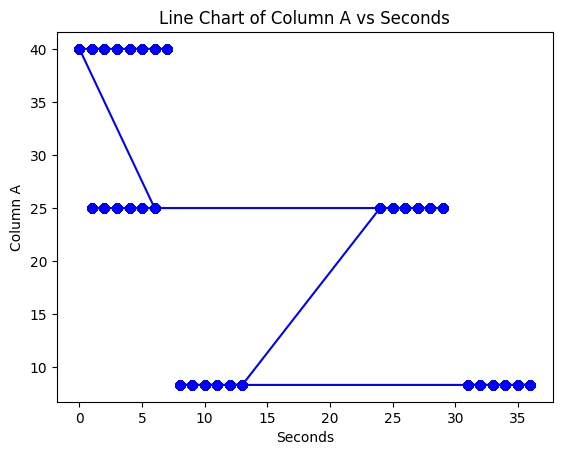

In [336]:
plt.plot(df6['second'], df6['speedSet'], color='blue', marker='o', linestyle='-')


plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

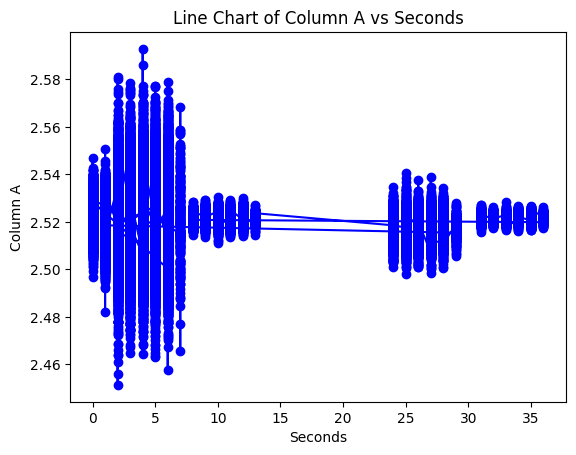

In [337]:
plt.plot(df6['second'], df6['sensor1'], color='blue', marker='o', linestyle='-')

plt.title('Line Chart of Column A vs Seconds')
plt.xlabel('Seconds')
plt.ylabel('Column A')

plt.show()

In [338]:
#Missing values
print(df6.isnull().sum())

sensor1            0
sensor2            0
time_x             0
speedSet           0
load_value         0
gear_fault_desc    0
time_x_seconds     0
minute             0
second             0
dtype: int64


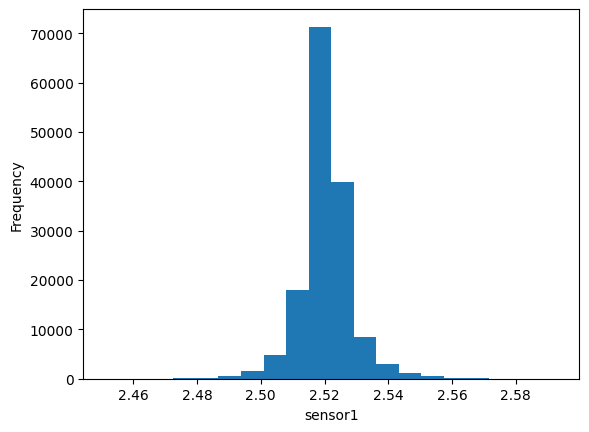

In [339]:
# Distribution of numerical columns
plt.hist(df6['sensor1'], bins=20)
plt.xlabel('sensor1')
plt.ylabel('Frequency')
plt.show()

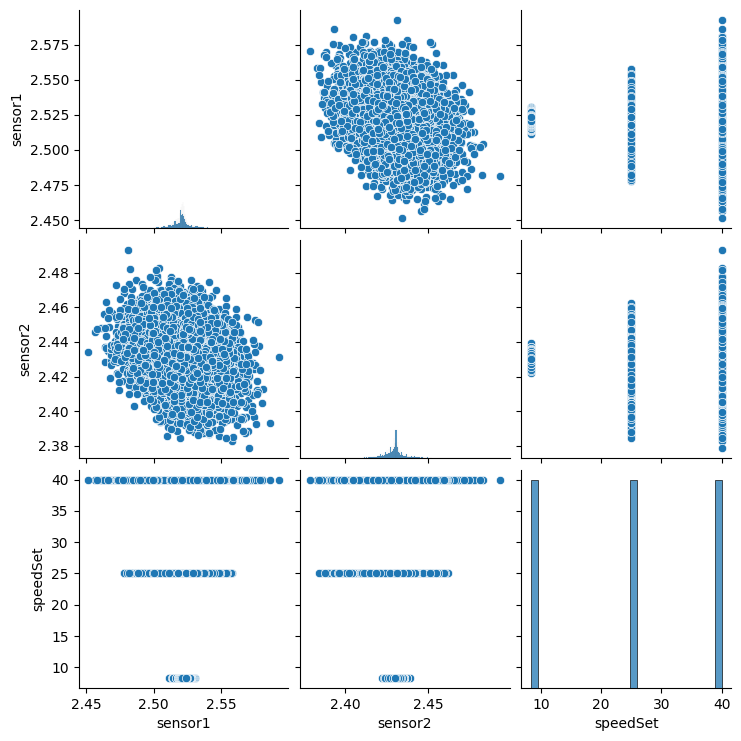

In [340]:
# Relationships between variables
sns.pairplot(df6[['sensor1', 'sensor2', 'speedSet']])
plt.show()

In [341]:
# Select only numeric columns
numeric_cols = df6.select_dtypes(include=['float64', 'int64'])

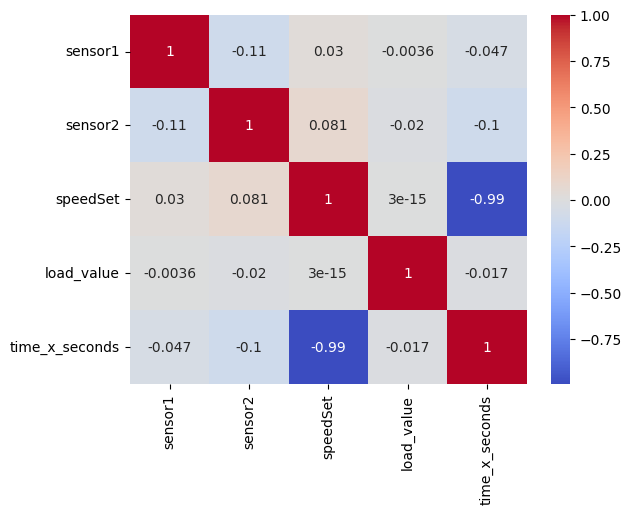

In [342]:
# Correlation matrix
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [343]:
print(df6['time_x'].iloc[0])

47:31.000000


# **Model Implementation**

In [344]:
import pandas as pd
import numpy as np

In [415]:
df_esc = pd.read_csv('/content/eccentricity.csv')
df_mis_tooth = pd.read_csv('/content/missing_tooth.csv')
df_no_fault = pd.read_csv('/content/no_fault.csv')

In [416]:
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [417]:
df_esc['time_x'].head()

0    31:39.0
1    31:39.0
2    31:39.0
3    31:39.0
4    31:39.0
Name: time_x, dtype: object

In [418]:
df_esc['time_x'] = pd.to_datetime(df_esc['time_x'], format='%M:%S.%f')


df_esc['day'] = df_esc['time_x'].dt.day
df_esc['month'] = df_esc['time_x'].dt.month
df_esc['year'] = df_esc['time_x'].dt.year
df_esc['hour'] = df_esc['time_x'].dt.hour
df_esc['minute'] = df_esc['time_x'].dt.minute
df_esc['second'] = df_esc['time_x'].dt.second + df_esc['time_x'].dt.microsecond / 1e6
df_esc['second_str'] = df_esc['time_x'].dt.strftime('%S.%f')

In [419]:
df_mis_tooth['time_x'] = pd.to_datetime(df_mis_tooth['time_x'], format='%M:%S.%f')




df_mis_tooth['day'] = df_mis_tooth['time_x'].dt.day
df_mis_tooth['month'] = df_mis_tooth['time_x'].dt.month
df_mis_tooth['year'] = df_mis_tooth['time_x'].dt.year
df_mis_tooth['hour'] = df_mis_tooth['time_x'].dt.hour
df_mis_tooth['minute'] = df_mis_tooth['time_x'].dt.minute
df_mis_tooth['second'] = df_mis_tooth['time_x'].dt.second + df_mis_tooth['time_x'].dt.microsecond / 1e6


df_mis_tooth['second_str'] = df_mis_tooth['time_x'].dt.strftime('%S.%f')

In [420]:
df_no_fault['time_x'] = pd.to_datetime(df_no_fault['time_x'], format='%M:%S.%f')




df_no_fault['day'] = df_no_fault['time_x'].dt.day
df_no_fault['month'] = df_no_fault['time_x'].dt.month
df_no_fault['year'] = df_no_fault['time_x'].dt.year
df_no_fault['hour'] = df_no_fault['time_x'].dt.hour
df_no_fault['minute'] = df_no_fault['time_x'].dt.minute
df_no_fault['second'] = df_no_fault['time_x'].dt.second + df_no_fault['time_x'].dt.microsecond / 1e6


df_no_fault['second_str'] = df_no_fault['time_x'].dt.strftime('%S.%f')

In [421]:
df_esc.shape

(150000, 13)

In [422]:
# Remove rows with NaN values
df_esc_cleaned = df_esc.dropna()
print(df_esc_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.522315  2.431974 1900-01-01 00:31:39   8.332031           0   
1       2.523629  2.431317 1900-01-01 00:31:39   8.332031           0   
2       2.522644  2.428032 1900-01-01 00:31:39   8.332031           0   
3       2.521987  2.430660 1900-01-01 00:31:39   8.332031           0   
4       2.522808  2.430168 1900-01-01 00:31:39   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.525272  2.451028 1900-01-01 00:29:40  40.000000          80   
149996  2.529542  2.442815 1900-01-01 00:29:40  40.000000          80   
149997  2.519851  2.447579 1900-01-01 00:29:40  40.000000          80   
149998  2.516073  2.431153 1900-01-01 00:29:40  40.000000          80   
149999  2.517059  2.442979 1900-01-01 00:29:40  40.000000          80   

       gear_fault_desc  day  month  year  hour  minute  second second_str  
0         eccentricity    1      1  1900     0 

In [423]:
df_mis_tooth.shape

(150000, 13)

In [424]:
# Remove rows with NaN values
df_mis_tooth_cleaned = df_mis_tooth.dropna()
print(df_mis_tooth_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.520016  2.430496 1900-01-01 00:06:37   8.332031           0   
1       2.521822  2.430660 1900-01-01 00:06:37   8.332031           0   
2       2.519194  2.429511 1900-01-01 00:06:37   8.332031           0   
3       2.519851  2.428853 1900-01-01 00:06:37   8.332031           0   
4       2.518701  2.429346 1900-01-01 00:06:37   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.530692  2.437888 1900-01-01 00:26:55  40.000000          80   
149996  2.516566  2.446593 1900-01-01 00:26:55  40.000000          80   
149997  2.488643  2.418505 1900-01-01 00:26:55  40.000000          80   
149998  2.529542  2.430003 1900-01-01 00:26:55  40.000000          80   
149999  2.498334  2.427704 1900-01-01 00:26:55  40.000000          80   

       gear_fault_desc  day  month  year  hour  minute  second second_str  
0        missing tooth    1      1  1900     0 

In [425]:
df_no_fault.shape

(150000, 13)

In [426]:
# Remove rows with NaN values
df_no_fault_cleaned = df_no_fault.dropna()
print(df_no_fault_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.523465  2.430168 1900-01-01 00:47:31   8.332031           0   
1       2.521494  2.430003 1900-01-01 00:47:31   8.332031           0   
2       2.522479  2.429675 1900-01-01 00:47:31   8.332031           0   
3       2.521330  2.431810 1900-01-01 00:47:31   8.332031           0   
4       2.522479  2.431317 1900-01-01 00:47:31   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.549417  2.441830 1900-01-01 00:06:07  40.000000          80   
149996  2.496363  2.453820 1900-01-01 00:06:07  40.000000          80   
149997  2.520837  2.418505 1900-01-01 00:06:07  40.000000          80   
149998  2.499319  2.417027 1900-01-01 00:06:07  40.000000          80   
149999  2.515088  2.419984 1900-01-01 00:06:07  40.000000          80   

       gear_fault_desc  day  month  year  hour  minute  second second_str  
0             No fault    1      1  1900     0 

In [427]:
print(df_esc.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [428]:
df_esc = df_esc.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [429]:
print(df_no_fault.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [430]:
columns_to_drop = ['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value', 'gear_fault_desc']
df_no_fault = df_no_fault.drop(columns_to_drop, axis=1)

In [431]:
df_mis_tooth = df_mis_tooth.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [432]:
df_esc_sorted = df_esc.sort_values(by='second')

In [433]:
df_esc_sorted.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50000,2.520344,2.433617,25.0,0,eccentricity,0.0,00.000000
50162,2.523793,2.428032,25.0,0,eccentricity,0.0,00.000000
50163,2.518044,2.428689,25.0,0,eccentricity,0.0,00.000000
50164,2.522479,2.432796,25.0,0,eccentricity,0.0,00.000000
50165,2.516566,2.431482,25.0,0,eccentricity,0.0,00.000000


In [434]:
df_esc_sorted

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
50000,2.520344,2.433617,25.000000,0,eccentricity,0.0,00.000000
50162,2.523793,2.428032,25.000000,0,eccentricity,0.0,00.000000
50163,2.518044,2.428689,25.000000,0,eccentricity,0.0,00.000000
50164,2.522479,2.432796,25.000000,0,eccentricity,0.0,00.000000
50165,2.516566,2.431482,25.000000,0,eccentricity,0.0,00.000000
...,...,...,...,...,...,...,...
24841,2.521822,2.430660,8.332031,0,eccentricity,44.0,44.000000
24842,2.520508,2.430660,8.332031,0,eccentricity,44.0,44.000000
24843,2.521658,2.431974,8.332031,0,eccentricity,44.0,44.000000
24830,2.522151,2.431153,8.332031,0,eccentricity,44.0,44.000000


In [435]:
df_esc_sorted = df_esc_sorted.drop('second_str', axis=1)

In [436]:
print(df_esc_sorted.columns)

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_fault_desc',
       'second'],
      dtype='object')


In [437]:
group_numbers = (df_esc_sorted.index // 50) + 1

In [438]:
df_grouped = df_esc_sorted.groupby('gear_fault_desc').mean()

In [439]:
df_grouped = df_grouped.drop('second',axis=1)

In [440]:
df_grouped_esc = df_grouped

In [441]:
df_grouped_esc['gear_type'] = 'eccentric_load'

In [442]:
df_grouped_esc.head()

,sensor1,sensor2,speedSet,load_value,gear_type
gear_fault_desc,,,,,
eccentricity,2.521244,2.430165,24.44401,40.0,eccentric_load


In [443]:
df_no_fault_sorted = df_no_fault.sort_values(by='second')

In [444]:
df_no_fault_sorted

,day,month,year,hour,minute,second,second_str
100114,1,1,1900,0,10,0.0,00.000000
100032,1,1,1900,0,10,0.0,00.000000
100033,1,1,1900,0,10,0.0,00.000000
100034,1,1,1900,0,10,0.0,00.000000
100035,1,1,1900,0,10,0.0,00.000000
...,...,...,...,...,...,...,...
24838,1,1,1900,0,47,36.0,36.000000
24839,1,1,1900,0,47,36.0,36.000000
24840,1,1,1900,0,47,36.0,36.000000
24827,1,1,1900,0,47,36.0,36.000000


In [445]:
print(df_no_fault_sorted.columns)

Index(['day', 'month', 'year', 'hour', 'minute', 'second', 'second_str'], dtype='object')


In [446]:
df_no_fault_sorted = df_no_fault_sorted.drop(['second_str'], axis=1)

In [447]:
group_numbers = (df_no_fault_sorted.index // 50) + 1

In [448]:
df_no_fault_grouped =df_no_fault_sorted.groupby(group_numbers).mean()

In [449]:
df_no_fault_grouped = df_no_fault_grouped.drop('second',axis=1)

In [450]:
df_no_fault_grouped['gear_type'] = 'no_fault'

In [451]:
df_no_fault_grouped

,day,month,year,hour,minute,gear_type
1,1.0,1.0,1900.0,0.0,47.0,no_fault
2,1.0,1.0,1900.0,0.0,47.0,no_fault
3,1.0,1.0,1900.0,0.0,47.0,no_fault
4,1.0,1.0,1900.0,0.0,47.0,no_fault
5,1.0,1.0,1900.0,0.0,47.0,no_fault
...,...,...,...,...,...,...
2996,1.0,1.0,1900.0,0.0,6.0,no_fault
2997,1.0,1.0,1900.0,0.0,6.0,no_fault
2998,1.0,1.0,1900.0,0.0,6.0,no_fault
2999,1.0,1.0,1900.0,0.0,6.0,no_fault


In [452]:
df_mis_tooth_sorted = df_mis_tooth.sort_values(by='second')

In [453]:
df_mis_tooth_sorted=df_mis_tooth_sorted.drop(['gear_fault_desc','second_str'],axis=1)

In [454]:
group_numbers = (df_mis_tooth_sorted.index // 50) + 1

In [455]:
df_mis_tooth_grouped =df_mis_tooth_sorted.groupby(group_numbers).mean()

In [456]:
df_mis_tooth_grouped = df_mis_tooth_grouped.drop('second',axis=1)

In [457]:
df_mis_tooth_grouped['gear_type'] = 'missing_tooth'

In [458]:
df_mis_tooth_grouped

,sensor1,sensor2,speedSet,load_value,gear_type
1,2.519230,2.429589,8.332031,0.0,missing_tooth
2,2.519381,2.430214,8.332031,0.0,missing_tooth
3,2.519884,2.430716,8.332031,0.0,missing_tooth
4,2.520104,2.430529,8.332031,0.0,missing_tooth
5,2.519953,2.430269,8.332031,0.0,missing_tooth
...,...,...,...,...,...
2996,2.518021,2.429419,40.000000,80.0,missing_tooth
2997,2.517371,2.429044,40.000000,80.0,missing_tooth
2998,2.517998,2.427106,40.000000,80.0,missing_tooth
2999,2.517016,2.426580,40.000000,80.0,missing_tooth


In [389]:
concatenated_df = pd.concat([df_grouped_esc, df_no_fault_grouped, df_mis_tooth_grouped], axis=0)

In [390]:
concatenated_df

,sensor1,sensor2,speedSet,load_value,gear_type,day,month,year,hour,minute
eccentricity,2.521244,2.430165,24.44401,40.0,eccentric_load,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
2,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
3,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
4,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...
2996,2.518021,2.429419,40.00000,80.0,missing_tooth,NaN,NaN,NaN,NaN,NaN
2997,2.517371,2.429044,40.00000,80.0,missing_tooth,NaN,NaN,NaN,NaN,NaN
2998,2.517998,2.427106,40.00000,80.0,missing_tooth,NaN,NaN,NaN,NaN,NaN
2999,2.517016,2.426580,40.00000,80.0,missing_tooth,NaN,NaN,NaN,NaN,NaN


In [391]:
concatenated_df['gear_type'].unique()

array(['eccentric_load', 'no_fault', 'missing_tooth'], dtype=object)

In [392]:
x = concatenated_df[['sensor1','sensor2','speedSet','load_value']]

In [393]:
y = concatenated_df['gear_type']

In [394]:
import numpy as np

In [395]:
from sklearn.preprocessing import LabelEncoder, StandardScaler




label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


scaler = StandardScaler()
x = scaler.fit_transform(x)

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [407]:
df_no_fault.head()

,day,month,year,hour,minute,second,second_str
0,1,1,1900,0,47,31.0,31.000000
1,1,1,1900,0,47,31.0,31.000000
2,1,1,1900,0,47,31.0,31.000000
3,1,1,1900,0,47,31.0,31.000000
4,1,1,1900,0,47,31.0,31.000000


In [408]:
df_esc.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
0,2.522315,2.431974,8.332031,0,0,39.0,39.000000
1,2.523629,2.431317,8.332031,0,0,39.0,39.000000
2,2.522644,2.428032,8.332031,0,0,39.0,39.000000
3,2.521987,2.430660,8.332031,0,0,39.0,39.000000
4,2.522808,2.430168,8.332031,0,0,39.0,39.000000


In [409]:
df_mis_tooth.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
0,2.520016,2.430496,8.332031,0,0,37.0,37.000000
1,2.521822,2.430660,8.332031,0,0,37.0,37.000000
2,2.519194,2.429511,8.332031,0,0,37.0,37.000000
3,2.519851,2.428853,8.332031,0,0,37.0,37.000000
4,2.518701,2.429346,8.332031,0,0,37.0,37.000000


In [411]:
df_combined.head()

,0,1,2,3,4,5,6
0,2.522315,2.431974,8.332031,0.0,0.0,39.0,39.0
1,2.523629,2.431317,8.332031,0.0,0.0,39.0,39.0
2,2.522644,2.428032,8.332031,0.0,0.0,39.0,39.0
3,2.521987,2.430660,8.332031,0.0,0.0,39.0,39.0
4,2.522808,2.430168,8.332031,0.0,0.0,39.0,39.0


In [469]:
df_combined.head()

,0,1,2,3,4,5
0,2.522315,2.431974,8.332031,0.0,39.0,39.0
1,2.523629,2.431317,8.332031,0.0,39.0,39.0
2,2.522644,2.428032,8.332031,0.0,39.0,39.0
3,2.521987,2.430660,8.332031,0.0,39.0,39.0
4,2.522808,2.430168,8.332031,0.0,39.0,39.0


In [470]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import *
y1=df_esc['gear_fault_desc']
y2=df_mis_tooth['gear_fault_desc']
df_esc1=df_esc.drop(['gear_fault_desc'],axis=1)
df_ns_tooth1=df_mis_tooth.drop(['gear_fault_desc'],axis=1)
# Impute missing values in individual datasets
#df_esc['gear_fault_desc']=LabelEncoder().fit_transform(df_esc['gear_fault_desc'])
#df_mis_tooth['gear_fault_desc']=LabelEncoder().fit_transform(df_mis_tooth['gear_fault_desc'])
#df_no_fault['gear_fault_desc']=LabelEncoder().fit_transform(df_no_fault['gear_fault_desc'])

imputer = SimpleImputer(strategy='mean')
df_esc_imputed = imputer.fit_transform(df_esc1)
df_mis_tooth_imputed = imputer.transform(df_ns_tooth1)
#df_no_fault_imputed = imputer.transform(df_no_fault)

# Combine the three datasets
df_combined = pd.concat([pd.DataFrame(df_esc_imputed), pd.DataFrame(df_mis_tooth_imputed)])
#df_combined['gear_fault_desc']=pd.concat([y1,y2],axis=0)
df_combined.columns=['sensor1','sensor2','speedSet','gear_fault_desc','load_value','second']
# Split the data into features (X) and target (y)
X = df_combined.drop(['gear_fault_desc'], axis=1)
y = df_combined['gear_fault_desc']
y=LabelEncoder().fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9991666666666666


In [484]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [486]:
df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

In [487]:
df.head()

,sensor1,sensor2,time_x,speedSet,load_value,gear_fault_desc
0,2.522315,2.431974,31:39.0,8.332031,0,eccentricity
1,2.523629,2.431317,31:39.0,8.332031,0,eccentricity
2,2.522644,2.428032,31:39.0,8.332031,0,eccentricity
3,2.521987,2.430660,31:39.0,8.332031,0,eccentricity
4,2.522808,2.430168,31:39.0,8.332031,0,eccentricity


In [488]:
df_root_crack['time_x'].head()

0    41:31.0
1    41:31.0
2    41:31.0
3    41:31.0
4    41:31.0
Name: time_x, dtype: object

In [489]:
df_root_crack['time_x'] = pd.to_datetime(df_root_crack['time_x'], format='%M:%S.%f')

df_root_crack['day'] = df_root_crack['time_x'].dt.day
df_esc['month'] = df_root_crack['time_x'].dt.month
df_root_crack['year'] = df_root_crack['time_x'].dt.year
df_root_crack['hour'] = df_root_crack['time_x'].dt.hour
df_root_crack['minute'] = df_root_crack['time_x'].dt.minute
df_root_crack['second'] = df_root_crack['time_x'].dt.second + df_root_crack['time_x'].dt.microsecond / 1e6
df_root_crack['second_str'] = df_root_crack['time_x'].dt.strftime('%S.%f')


In [490]:
df_surface_fault['time_x'] = pd.to_datetime(df_surface_fault['time_x'], format='%M:%S.%f')


df_surface_fault['day'] = df_surface_fault['time_x'].dt.day
df_surface_fault['month'] = df_surface_fault['time_x'].dt.month
df_surface_fault['year'] = df_surface_fault['time_x'].dt.year
df_surface_fault['hour'] = df_surface_fault['time_x'].dt.hour
df_surface_fault['minute'] = df_surface_fault['time_x'].dt.minute
df_surface_fault['second'] = df_surface_fault['time_x'].dt.second + df_surface_fault['time_x'].dt.microsecond / 1e6


df_surface_fault['second_str'] = df_surface_fault['time_x'].dt.strftime('%S.%f')

In [491]:
df_tooth_chipped['time_x'] = pd.to_datetime(df_tooth_chipped['time_x'], format='%M:%S.%f')


df_tooth_chipped['day'] = df_tooth_chipped['time_x'].dt.day
df_tooth_chipped['month'] = df_tooth_chipped['time_x'].dt.month
df_tooth_chipped['year'] = df_tooth_chipped['time_x'].dt.year
df_tooth_chipped['hour'] = df_tooth_chipped['time_x'].dt.hour
df_tooth_chipped['minute'] = df_tooth_chipped['time_x'].dt.minute
df_tooth_chipped['second'] = df_tooth_chipped['time_x'].dt.second + df_tooth_chipped['time_x'].dt.microsecond / 1e6


df_tooth_chipped['second_str'] = df_tooth_chipped['time_x'].dt.strftime('%S.%f')

In [493]:
df_root_crack.shape

(150000, 12)

In [492]:
# Remove rows with NaN values
df_root_crack_cleaned = df_root_crack.dropna()
print(df_root_crack_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.519358  2.429675 1900-01-01 00:41:31   8.332031           0   
1       2.519358  2.429839 1900-01-01 00:41:31   8.332031           0   
2       2.521165  2.430496 1900-01-01 00:41:31   8.332031           0   
3       2.520508  2.428853 1900-01-01 00:41:31   8.332031           0   
4       2.519358  2.428689 1900-01-01 00:41:31   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.545968  2.424911 1900-01-01 00:03:42  40.000000          80   
149996  2.507532  2.427539 1900-01-01 00:03:42  40.000000          80   
149997  2.530035  2.439530 1900-01-01 00:03:42  40.000000          80   
149998  2.534634  2.443801 1900-01-01 00:03:42  40.000000          80   
149999  2.507696  2.436081 1900-01-01 00:03:42  40.000000          80   

       gear_fault_desc  day  year  hour  minute  second second_str  
0           Root crack    1  1900     0      41    31.

In [494]:
df_surface_fault.shape

(150000, 13)

In [495]:
# Remove rows with NaN values
df_surface_fault_cleaned = df_surface_fault.dropna()
print(df_surface_fault_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.521001  2.427539 1900-01-01 00:35:14   8.332031           0   
1       2.519851  2.428196 1900-01-01 00:35:14   8.332031           0   
2       2.520016  2.426225 1900-01-01 00:35:14   8.332031           0   
3       2.520016  2.428689 1900-01-01 00:35:14   8.332031           0   
4       2.521165  2.427047 1900-01-01 00:35:14   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.502769  2.438052 1900-01-01 00:10:16  40.000000          80   
149996  2.506382  2.357074 1900-01-01 00:10:16  40.000000          80   
149997  2.511638  2.457598 1900-01-01 00:10:16  40.000000          80   
149998  2.552210  2.387625 1900-01-01 00:10:16  40.000000          80   
149999  2.503426  2.422119 1900-01-01 00:10:16  40.000000          80   

       gear_fault_desc  day  month  year  hour  minute  second second_str  
0       surface defect    1      1  1900     0 

In [497]:
df_tooth_chipped.shape

(150000, 13)

In [498]:
# Remove rows with NaN values
df_tooth_chipped_cleaned = df_tooth_chipped.dropna()
print(df_tooth_chipped_cleaned)

         sensor1   sensor2              time_x   speedSet  load_value  \
0       2.518209  2.430496 1900-01-01 00:53:07   8.332031           0   
1       2.517880  2.429839 1900-01-01 00:53:07   8.332031           0   
2       2.516402  2.427211 1900-01-01 00:53:07   8.332031           0   
3       2.518537  2.427704 1900-01-01 00:53:07   8.332031           0   
4       2.518701  2.427539 1900-01-01 00:53:07   8.332031           0   
...          ...       ...                 ...        ...         ...   
149995  2.513281  2.436245 1900-01-01 00:40:24  40.000000          80   
149996  2.521822  2.429018 1900-01-01 00:40:24  40.000000          80   
149997  2.500962  2.417520 1900-01-01 00:40:24  40.000000          80   
149998  2.518209  2.410457 1900-01-01 00:40:24  40.000000          80   
149999  2.536934  2.440680 1900-01-01 00:40:24  40.000000          80   

       gear_fault_desc  day  month  year  hour  minute  second second_str  
0        chipped tooth    1      1  1900     0 

In [500]:
print(df_root_crack.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [501]:
df_root_crack = df_root_crack.drop(['day','year','hour','minute','time_x'],axis=1)

In [502]:
print(df_tooth_chipped.columns)

Index(['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value',
       'gear_fault_desc', 'day', 'month', 'year', 'hour', 'minute', 'second',
       'second_str'],
      dtype='object')


In [503]:
columns_to_drop = ['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value', 'gear_fault_desc']
df_tooth_chipped =df_tooth_chipped.drop(columns_to_drop, axis=1)

In [504]:
df_surface_fault = df_surface_fault.drop(['day','month','year','hour','minute','time_x'],axis=1)

In [505]:
df_root_crack_sorted = df_root_crack.sort_values(by='second')

In [506]:
df_root_crack_sorted.head()

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
100001,2.524286,2.427047,40.0,0,Root crack,3.0,03.000000
100093,2.531021,2.429346,40.0,0,Root crack,3.0,03.000000
100092,2.509175,2.442322,40.0,0,Root crack,3.0,03.000000
100091,2.512460,2.443472,40.0,0,Root crack,3.0,03.000000
100090,2.532335,2.429346,40.0,0,Root crack,3.0,03.000000


In [507]:
df_root_crack_sorted

,sensor1,sensor2,speedSet,load_value,gear_fault_desc,second,second_str
100001,2.524286,2.427047,40.000000,0,Root crack,3.0,03.000000
100093,2.531021,2.429346,40.000000,0,Root crack,3.0,03.000000
100092,2.509175,2.442322,40.000000,0,Root crack,3.0,03.000000
100091,2.512460,2.443472,40.000000,0,Root crack,3.0,03.000000
100090,2.532335,2.429346,40.000000,0,Root crack,3.0,03.000000
...,...,...,...,...,...,...,...
49840,2.519358,2.431482,8.332031,80,Root crack,57.0,57.000000
49841,2.519851,2.430332,8.332031,80,Root crack,57.0,57.000000
49842,2.520016,2.430496,8.332031,80,Root crack,57.0,57.000000
49829,2.522808,2.429511,8.332031,80,Root crack,57.0,57.000000


In [508]:
df_root_crack_sorted=df_root_crack_sorted.drop('second_str',axis=1)

In [509]:
df_root_crack_sorted.columns

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_fault_desc',
       'second'],
      dtype='object')

In [510]:
print(df_root_crack_sorted['gear_fault_desc'].unique())

['Root crack']


In [511]:
# Assuming 'Root crack' is the column you want to exclude
numeric_cols = df_root_crack_sorted.columns[df_root_crack_sorted.dtypes != 'object']
group_numbers = (df_root_crack_sorted.index // 50) + 1
df_root_crack_grouped = df_root_crack_sorted[numeric_cols].groupby(group_numbers).mean()

In [512]:
print(df_grouped.columns)

Index(['sensor1', 'sensor2', 'speedSet', 'load_value', 'gear_type'], dtype='object')


In [514]:
df_grouped = df_grouped.drop('gear_type',axis=1)

In [515]:
df_grouped_root_crack = df_grouped

In [516]:
df_grouped_root_crack['gear_type'] = 'eccentric_load'

In [517]:
df_grouped_root_crack.head()

,sensor1,sensor2,speedSet,load_value,gear_type
gear_fault_desc,,,,,
eccentricity,2.521244,2.430165,24.44401,40.0,eccentric_load


In [518]:
df_tooth_chipped_sorted = df_tooth_chipped.sort_values(by='second')

In [519]:
df_tooth_chipped_sorted

,day,month,year,hour,minute,second,second_str
84982,1,1,1900,0,32,0.0,00.000000
84832,1,1,1900,0,32,0.0,00.000000
84831,1,1,1900,0,32,0.0,00.000000
84830,1,1,1900,0,32,0.0,00.000000
84829,1,1,1900,0,32,0.0,00.000000
...,...,...,...,...,...,...,...
84411,1,1,1900,0,31,59.9,59.900000
84410,1,1,1900,0,31,59.9,59.900000
84409,1,1,1900,0,31,59.9,59.900000
84422,1,1,1900,0,31,59.9,59.900000


In [520]:
print(df_tooth_chipped_sorted.columns)

Index(['day', 'month', 'year', 'hour', 'minute', 'second', 'second_str'], dtype='object')


In [521]:
df_tooth_chipped_sorted=df_tooth_chipped_sorted.drop(['second_str'],axis=1)

In [522]:
group_numbers = (df_tooth_chipped_sorted.index // 50) + 1

df_tooth_chipped_grouped =df_tooth_chipped_sorted.groupby(group_numbers).mean()

In [523]:
df_tooth_chipped_grouped = df_tooth_chipped_grouped.drop('second',axis=1)

In [524]:
df_tooth_chipped_grouped['gear_type'] = 'no_fault'

In [525]:
df_tooth_chipped_grouped

,day,month,year,hour,minute,gear_type
1,1.0,1.0,1900.0,0.0,53.0,no_fault
2,1.0,1.0,1900.0,0.0,53.0,no_fault
3,1.0,1.0,1900.0,0.0,53.0,no_fault
4,1.0,1.0,1900.0,0.0,53.0,no_fault
5,1.0,1.0,1900.0,0.0,53.0,no_fault
...,...,...,...,...,...,...
2996,1.0,1.0,1900.0,0.0,40.0,no_fault
2997,1.0,1.0,1900.0,0.0,40.0,no_fault
2998,1.0,1.0,1900.0,0.0,40.0,no_fault
2999,1.0,1.0,1900.0,0.0,40.0,no_fault


In [526]:
df_surface_fault_sorted = df_surface_fault.sort_values(by='second')

In [527]:
df_surface_fault_sorted=df_surface_fault_sorted.drop(['gear_fault_desc','second_str'],axis=1)

In [528]:
group_numbers = (df_root_crack_sorted.index // 50) + 1

df_surface_fault_grouped =df_surface_fault_sorted.groupby(group_numbers).mean()

In [529]:
df_surface_fault_grouped = df_surface_fault_grouped.drop('second',axis=1)

In [530]:
df_surface_fault_grouped['gear_type'] = 'surface_fault'

In [531]:
df_surface_fault_grouped

,sensor1,sensor2,speedSet,load_value,gear_type
1,2.518833,2.429731,25.0,80.0,surface_fault
2,2.519812,2.428052,25.0,80.0,surface_fault
3,2.519516,2.427901,25.0,80.0,surface_fault
4,2.518895,2.430329,25.0,80.0,surface_fault
5,2.519851,2.425861,25.0,80.0,surface_fault
...,...,...,...,...,...
2996,2.519401,2.428210,25.0,0.0,surface_fault
2997,2.514181,2.427516,26.2,0.0,surface_fault
2998,2.518432,2.429527,25.0,0.0,surface_fault
2999,2.518281,2.429162,25.0,0.0,surface_fault


In [532]:
concatenated_df = pd.concat([df_grouped_root_crack, df_tooth_chipped_grouped, df_surface_fault_grouped], axis=0)

In [533]:
concatenated_df

,sensor1,sensor2,speedSet,load_value,gear_type,day,month,year,hour,minute
eccentricity,2.521244,2.430165,24.44401,40.0,eccentric_load,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,53.0
2,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,53.0
3,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,53.0
4,NaN,NaN,NaN,NaN,no_fault,1.0,1.0,1900.0,0.0,53.0
...,...,...,...,...,...,...,...,...,...,...
2996,2.519401,2.428210,25.00000,0.0,surface_fault,NaN,NaN,NaN,NaN,NaN
2997,2.514181,2.427516,26.20000,0.0,surface_fault,NaN,NaN,NaN,NaN,NaN
2998,2.518432,2.429527,25.00000,0.0,surface_fault,NaN,NaN,NaN,NaN,NaN
2999,2.518281,2.429162,25.00000,0.0,surface_fault,NaN,NaN,NaN,NaN,NaN


In [534]:
concatenated_df['gear_type'].unique()

array(['eccentric_load', 'no_fault', 'surface_fault'], dtype=object)

In [535]:
x = concatenated_df[['sensor1','sensor2','speedSet','load_value']]

In [536]:
y = concatenated_df['gear_type']

In [537]:
import pandas as pd

df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

In [538]:
print("Unique values in y_test:", y_test.unique())
print("Unique values in y_test_pred:", np.unique(y_test_pred))

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [547]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Combine the three datasets
df_combined = pd.concat([df_root_crack, df_surface_fault, df_tooth_chipped])

# Split the data into features (X) and target (y), excluding the 'time_x' column
X = df_combined[['sensor1', 'sensor2', 'speedSet', 'load_value']]
y = df_combined['gear_fault_desc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the SVM classifier
svm_classifier.fit(X_train_imputed, y_train)

# Make predictions on the training set
y_train_pred = svm_classifier.predict(X_train_imputed)

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test_imputed)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9991166666666667


In [561]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
df_root_crack = pd.read_csv('/content/root_crack.csv')
df_surface_fault = pd.read_csv('/content/surface_fault.csv')
df_tooth_chipped = pd.read_csv('/content/tooth_chipped_fault.csv')

# Combine the three datasets
df_combined = pd.concat([df_root_crack, df_surface_fault, df_tooth_chipped])

# Split the data into features (X) and target (y)
X = df_combined[['sensor1', 'sensor2', 'time_x', 'speedSet', 'load_value']]
y = df_combined['gear_fault_desc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')

# Train the SVM classifier
svm_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test_imputed)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

NameError: name 'test_accuracy' is not defined

In [551]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [552]:
print(len(y_test), len(y_test_pred))

90000 60000


In [556]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

DEPLOYMENT

In [542]:
pip install streamlit